In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fix_yahoo_finance as yf
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
%matplotlib inline
import numpy as np

In [1]:
import wrds
db= wrds.Connection()

Enter your WRDS username [Administrator]:lagaras2
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done


In [ ]:
data = db.get_table(library='ibes',table = 'DET_GUIDANCE')

In [4]:
data = db.get_table(library='crsp',table = 'CCMXPF_LNKUSED')

In [3]:
data1 = db.get_table(library='dealscan',table = 'company',columns=['COMPANYID','PUBLICPRIVATE','COMPANY','COUNTRY','STATE','TICKER'])

In [4]:
data1.to_excel('G:/original files dealscan public/DEALSCAN_COMPANY.xlsx',index=True)

In [8]:
RET = pd.DataFrame()
for tic in ['JD','AAPL','GOOGL','TSLA']:
    tic_price  = yf.download(tic ,'2015-9-30','2018-9-30').asfreq('BM')
    tic_price['ret']= (tic_price['Adj Close']-tic_price['Adj Close'].shift(1))/tic_price['Adj Close'].shift(1)
    RET = pd.concat([RET,tic_price['ret']],axis=1)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [10]:
RET.to_excel('C:/Users/Administrator/Desktop/1.xlsx')

In [2]:
JD = yf.download('JD','2015-10-31','2018-10-31')['']

[*********************100%***********************]  1 of 1 downloaded


In [3]:
SPY = yf.download('SPY','2017-10-31','2018-10-31')

[*********************100%***********************]  1 of 1 downloaded


In [5]:
JD.index

DatetimeIndex(['2017-10-30', '2017-10-31', '2017-11-01', '2017-11-02',
               '2017-11-03', '2017-11-06', '2017-11-07', '2017-11-08',
               '2017-11-09', '2017-11-10',
               ...
               '2018-10-17', '2018-10-18', '2018-10-19', '2018-10-22',
               '2018-10-23', '2018-10-24', '2018-10-25', '2018-10-26',
               '2018-10-29', '2018-10-30'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)

In [5]:
JD_SI = pd.read_excel('C:/Users/Administrator/Desktop/JD/JD-short-interest-2017-2018-semimonth.xlsx')
JD_SI.set_index('Settlement Date',inplace=True)
JD_SI.index = pd.to_datetime(JD_SI.index)
JD_SI.index

DatetimeIndex(['2018-10-15', '2018-09-28', '2018-09-14', '2018-08-31',
               '2018-08-15', '2018-07-31', '2018-07-13', '2018-06-29',
               '2018-06-15', '2018-05-31', '2018-05-15', '2018-04-30',
               '2018-04-13', '2018-03-29', '2018-03-15', '2018-02-28',
               '2018-02-15', '2018-01-31', '2018-01-12', '2017-12-29',
               '2017-12-15', '2017-11-30', '2017-11-15', '2017-10-31',
               '2017-10-13'],
              dtype='datetime64[ns]', name='Settlement Date', freq=None)

In [21]:
JD_SI_STOCK = pd.concat([JD, JD_SI], axis=1)
JD_SI_STOCK.head()

,Open,High,Low,Close,Adj Close,Volume,Short Interest,Avg Daily Share Volume,Days To Cover
2017-10-13,NaN,NaN,NaN,NaN,NaN,NaN,37109174.0,14522368.0,2.555312
2017-10-23,39.150002,39.200001,38.330002,38.430000,38.430000,13575900.0,NaN,NaN,NaN
2017-10-24,38.660000,38.814999,38.459999,38.520000,38.520000,11847100.0,NaN,NaN,NaN
2017-10-25,38.549999,38.970001,37.130001,37.400002,37.400002,22016400.0,NaN,NaN,NaN
2017-10-26,37.560001,37.680000,36.709999,36.810001,36.810001,19145500.0,NaN,NaN,NaN


In [7]:
JD_pct = JD['Adj Close'].pct_change()
SPY_pct = SPY['Adj Close'].pct_change()

In [23]:
JD_SI_STOCK['Short Interest'].fillna(method='ffill',inplace=True)
JD_SI_STOCK.head()

,Open,High,Low,Close,Adj Close,Volume,Short Interest,Avg Daily Share Volume,Days To Cover
2017-10-13,NaN,NaN,NaN,NaN,NaN,NaN,37109174.0,14522368.0,2.555312
2017-10-23,39.150002,39.200001,38.330002,38.430000,38.430000,13575900.0,37109174.0,NaN,NaN
2017-10-24,38.660000,38.814999,38.459999,38.520000,38.520000,11847100.0,37109174.0,NaN,NaN
2017-10-25,38.549999,38.970001,37.130001,37.400002,37.400002,22016400.0,37109174.0,NaN,NaN
2017-10-26,37.560001,37.680000,36.709999,36.810001,36.810001,19145500.0,37109174.0,NaN,NaN


In [6]:
sma20 = JD['Close'].rolling(20).mean()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


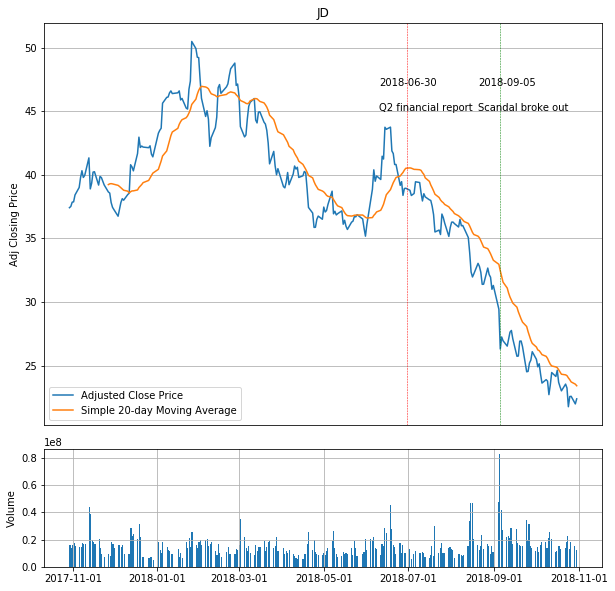

In [7]:
plt.figure(figsize=(10,10))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
top.plot(JD.index, JD['Adj Close'],label = 'Adjusted Close Price') 
top.plot(JD.index,sma20,label = 'Simple 20-day Moving Average')
top.grid('on') 
bottom.bar(JD.index, JD['Volume']) 
bottom.grid('on')
top.axvline(x = '2018-06-30', color = "red", lw=0.5, linestyle='dashed')
top.text('2018-06-10',47,'2018-06-30',rotation=0)
top.text('2018-06-10',45,'Q2 financial report',rotation=0)
top.axvline(x = '2018-09-05', color = "green", lw=0.5, linestyle='dashed')
top.text('2018-08-20',47,'2018-09-05',rotation=0)
top.text('2018-08-20',45,'Scandal broke out',rotation=0)
# set the labels
top.axes.get_xaxis().set_visible(False)
top.set_title('JD')
top.set_ylabel('Adj Closing Price')
bottom.set_ylabel('Volume')
bottom.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
top.legend()

JD's stock price is 46% lower than its Januaray peak. Two reasons may be behind the drop of stock price. 

The first is the breaking scandal of the arrest of Qiangdong Liu. As can be seen from the graph, the trading volume is at its highest on the first trading day after the scandal. 

The second is the unfavorable financial report of Q2 in 2018. The growth rate of GMV (Gross Merchandise Volume) has dropped compared to the past. Net profit has also dropped by 50% compared to Q2 of 2017.





In [3]:
Options = pd.read_csv('G:/1029desktop/UnderlyingOptionsEODQuotes_JD.csv')

In [4]:
Options.head()

,underlying_symbol,quote_date,root,expiration,strike,option_type,open,high,low,close,...,underlying_ask_1545,bid_size_eod,bid_eod,ask_size_eod,ask_eod,underlying_bid_eod,underlying_ask_eod,vwap,open_interest,delivery_code
0,JD,2017/10/31,JD,2017/11/3,31.0,c,0.0,0.0,0.0,0.0,...,37.61,40,6.45,42,6.70,37.51,37.52,0.0,2,0
1,JD,2017/10/31,JD,2017/11/3,31.0,p,0.0,0.0,0.0,0.0,...,37.61,0,0.00,103,0.03,37.51,37.52,0.0,17,0
2,JD,2017/10/31,JD,2017/11/3,31.5,c,0.0,0.0,0.0,0.0,...,37.61,94,5.90,42,6.40,37.51,37.52,0.0,2,0
3,JD,2017/10/31,JD,2017/11/3,31.5,p,0.0,0.0,0.0,0.0,...,37.61,0,0.00,60,0.03,37.51,37.52,0.0,4,0
4,JD,2017/10/31,JD,2017/11/3,32.0,c,0.0,0.0,0.0,0.0,...,37.61,46,5.45,45,5.80,37.51,37.52,0.0,1,0


In [5]:
OI_strike = Options.groupby(['option_type','strike'])['open_interest'].mean().reset_index()

In [6]:
V_strike = Options.groupby(['option_type','strike'])['trade_volume'].mean().reset_index()

In [7]:
V_strike.index = V_strike['strike']
V_strike = V_strike.drop(['strike'],axis=1)
V_strike_C = V_strike[(V_strike.option_type == 'c')]
V_strike_P = V_strike[(V_strike.option_type == 'p')]

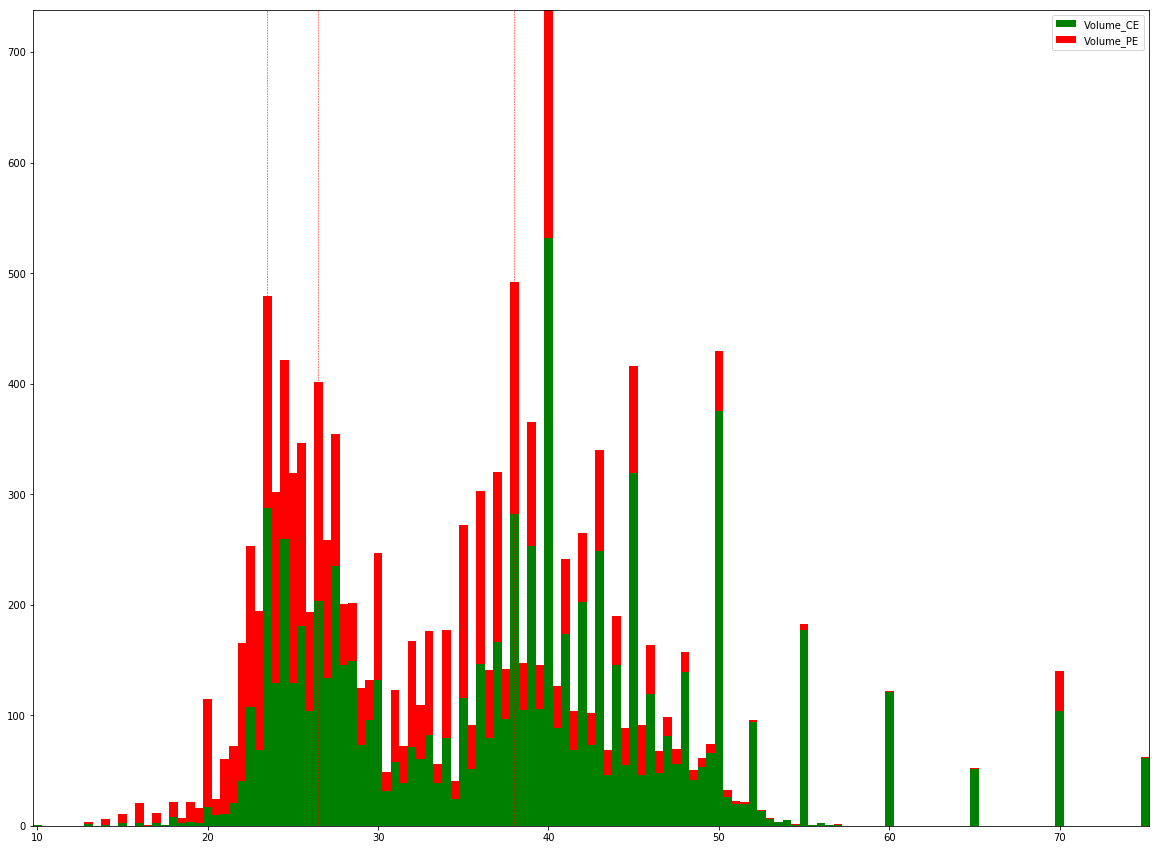

In [47]:
plt.figure(figsize=(20,15))
x2 = V_strike_C.index
x1 = V_strike_P.index
w = 0.5
plt.bar(x2, V_strike_C['trade_volume'],width=w, color='g',align='center', lw=1,label ="Volume_CE")
plt.bar(x1, V_strike_P['trade_volume'],bottom =V_strike_C['trade_volume'], width=w,color='r',align='center',label ="Volume_PE")
# ax.bar(x+w, k,width=w,color='r',align='center')
# ax.xaxis_date()
plt.axvline(x = 23.5, color = "red", lw=0.5, linestyle='dashed')
plt.axvline(x = 26.5, color = "red", lw=0.5, linestyle='dashed')
plt.axvline(x = 38, color = "red", lw=0.5, linestyle='dashed')
plt.autoscale(tight=True)
plt.legend()
plt.show()

In [10]:
OI_strike.index = OI_strike['strike']
OI_strike = OI_strike.drop(['strike'],axis=1)

In [11]:
OI_strike_C = OI_strike[(OI_strike.option_type == 'c')]

In [12]:
OI_strike_P = OI_strike[(OI_strike.option_type == 'p')]

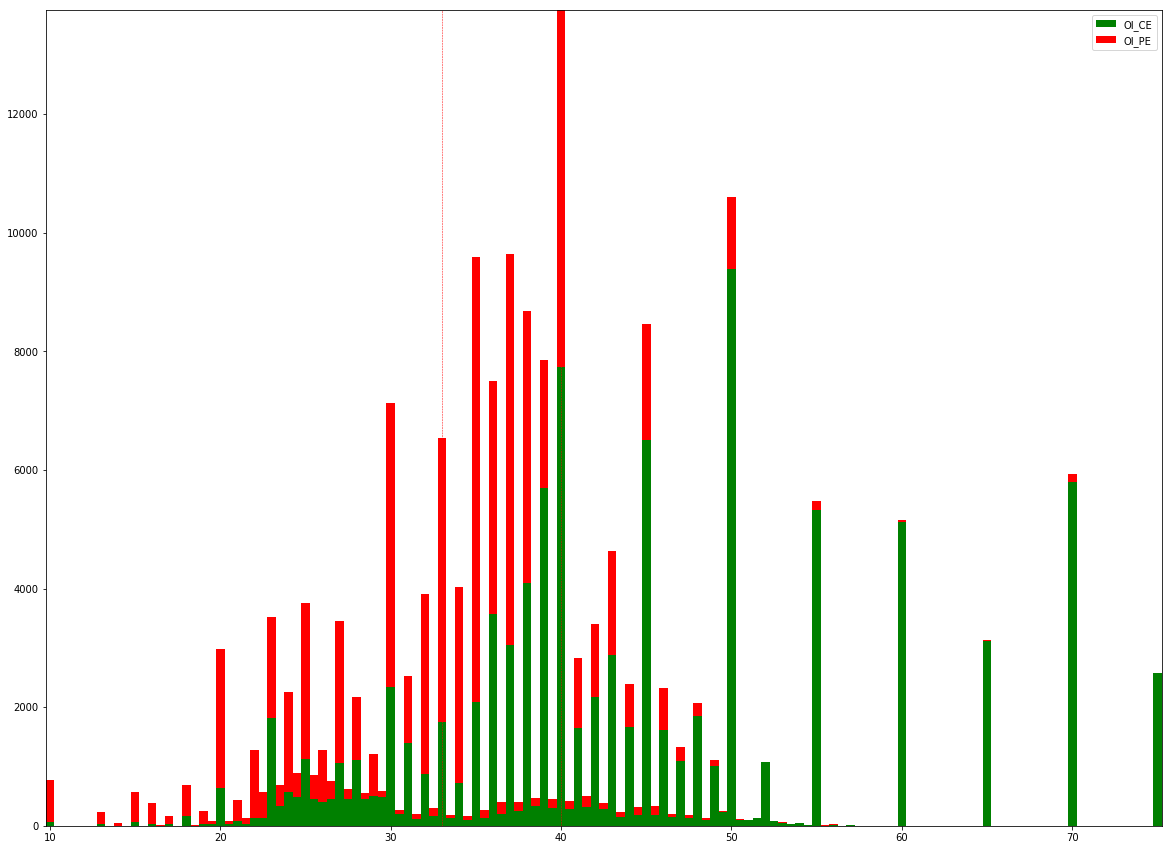

In [49]:
plt.figure(figsize=(20,15))
x2 = OI_strike_C.index
x1 = OI_strike_P.index
w = 0.5
plt.bar(x2, OI_strike_C['open_interest'],width=w, color='g',align='center', lw=1,label ="OI_CE")
plt.bar(x1, OI_strike_P['open_interest'],bottom =OI_strike_C['open_interest'], width=w,color='r',align='center',label ="OI_PE")
plt.axvline(x = 33, color = "red", lw=0.5, linestyle='dashed')
plt.axvline(x = 40, color = "red", lw=0.5, linestyle='dashed')
# ax.bar(x+w, k,width=w,color='r',align='center')
# ax.xaxis_date()
plt.autoscale(tight=True)
plt.legend()
plt.show()

In [61]:
OI_mean = Options.groupby(['quote_date','strike','option_type'])['open_interest'].mean()

In [62]:
OI_mean = OI_mean.reset_index(['strike','option_type'])

In [14]:
V_mean = Options.groupby(['quote_date','strike'])['trade_volume'].mean()
V_mean = V_mean.reset_index(['strike'])


In [15]:
V_mean_CP = Options.groupby(['quote_date','strike','option_type'])['trade_volume'].mean()
V_mean_CP = V_mean_CP.reset_index(['strike','option_type'])

In [79]:
V_mean_38PE = V_mean_CP[(V_mean_CP.strike == 38)&(V_mean_CP.option_type == 'p')]
V_mean_38PE.index = pd.to_datetime(V_mean_38PE.index).sort_values()
V_mean_38CE = V_mean_CP[(V_mean_CP.strike == 38)&(V_mean_CP.option_type == 'c')]
V_mean_38CE.index =  pd.to_datetime(V_mean_38CE.index).sort_values()

In [80]:
V_mean_38PE.rename(columns={'trade_volume': 'trade_volume_PE'}, inplace=True)
V_mean_38PE.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,strike,option_type,trade_volume_PE
quote_date,,,
2017-10-31,38.0,p,68.181818
2017-11-01,38.0,p,2088.727273
2017-11-02,38.0,p,411.666667
2017-11-03,38.0,p,733.727273
2017-11-06,38.0,p,396.909091


In [81]:
V_mean_38CE.rename(columns={'trade_volume': 'trade_volume_CE'}, inplace=True)
V_mean_38CE.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,strike,option_type,trade_volume_CE
quote_date,,,
2017-10-31,38.0,c,260.181818
2017-11-01,38.0,c,1150.909091
2017-11-02,38.0,c,227.250000
2017-11-03,38.0,c,285.909091
2017-11-06,38.0,c,492.454545


In [82]:
PC_ratio = pd.concat([V_mean_38CE, V_mean_38PE], axis=1)

In [83]:
PC_ratio_stock = pd.concat([JD['Adj Close'],PC_ratio],axis=1)

In [84]:
PC_ratio_stock['ratio'] = PC_ratio['trade_volume_PE']/PC_ratio['trade_volume_CE'].ffill()
PC_ratio_stock['MA'] = PC_ratio_stock['ratio'].rolling(window=5).mean().ffill()
PC_ratio_stock.head(20)

,Adj Close,strike,option_type,trade_volume_CE,strike,option_type,trade_volume_PE,ratio,MA
2017-10-30,37.419998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-31,37.520000,38.0,c,260.181818,38.0,p,68.181818,0.262055,NaN
2017-11-01,37.860001,38.0,c,1150.909091,38.0,p,2088.727273,1.814850,NaN
2017-11-02,37.880001,38.0,c,227.250000,38.0,p,411.666667,1.811514,NaN
2017-11-03,38.419998,38.0,c,285.909091,38.0,p,733.727273,2.566296,NaN
2017-11-06,39.009998,38.0,c,492.454545,38.0,p,396.909091,0.805981,1.452139
2017-11-07,39.790001,38.0,c,353.818182,38.0,p,695.909091,1.966855,1.793099
2017-11-08,40.330002,38.0,c,212.090909,38.0,p,539.727273,2.544792,1.939088
2017-11-09,39.799999,38.0,c,223.727273,38.0,p,77.727273,0.347420,1.646269
2017-11-10,39.959999,38.0,c,680.916667,38.0,p,1291.916667,1.897320,1.512474


In [85]:
PC_ratio_stock.index = pd.to_datetime(PC_ratio_stock.index).sort_values()

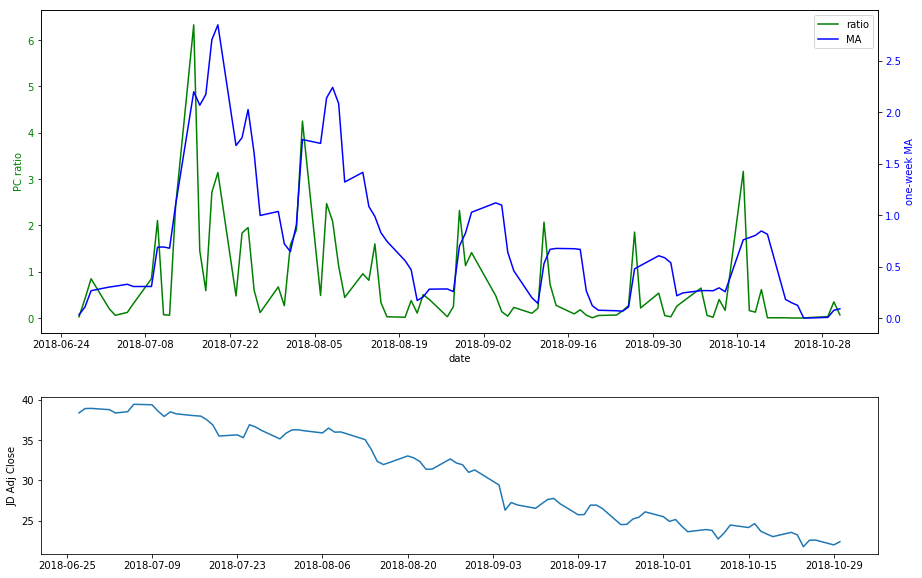

In [86]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(10,10)

ax1 =  plt.subplot(gs[0:6, :])
color = 'green'
ax1.set_xlabel('date')
ax1.set_ylabel('PC ratio', color=color)
ax1.plot(PC_ratio_stock.index[165:], (PC_ratio_stock.ratio[165:]), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('one-week MA', color=color)  # we already handled the x-label with ax1
ax2.plot(PC_ratio_stock.index[165:],(PC_ratio_stock.MA[165:]), color=color)
ax2.tick_params(axis='y', labelcolor=color)
handles,labels = [],[]
for ax in [ax1,ax2]:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
plt.legend(handles,labels)
ax3 = plt.subplot(gs[7:, :])
ax3.plot(PC_ratio_stock.index[165:],PC_ratio_stock['Adj Close'][165:])
ax3.set_ylabel('JD Adj Close')

# fig.tight_layout()
 # otherwise the right y-label is slightly clipped
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


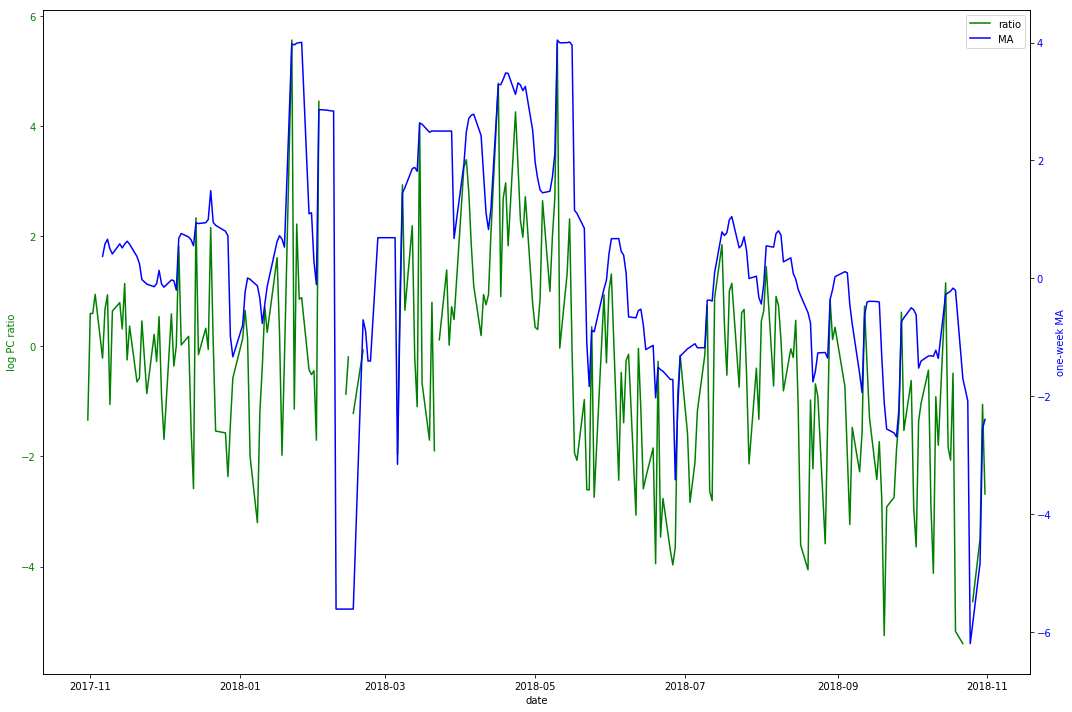

In [90]:
# plt.figure(figsize=(15,10))

# plt.plot(PC_ratio.index,PC_ratio.ratio,label ='PC ratio')
# plt.plot(PC_ratio.index,PC_ratio.MA,label ='one-week MA')

fig, ax1 = plt.subplots(figsize=(15,10))

color = 'green'
ax1.set_xlabel('date')
ax1.set_ylabel('log PC ratio', color=color)
ax1.plot(PC_ratio_stock.index, np.log(PC_ratio_stock.ratio), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('one-week MA', color=color)  # we already handled the x-label with ax1
ax2.plot(PC_ratio_stock.index,np.log(PC_ratio_stock.MA), color=color)
ax2.tick_params(axis='y', labelcolor=color)
handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)

fig.tight_layout()
 # otherwise the right y-label is slightly clipped
plt.show()

In [70]:
V_mean_38 = V_mean[(V_mean.strike == 38)]
V_mean_38.index =  pd.to_datetime(V_mean_38.index).sort_values()

In [71]:
OI_mean_38CE = OI_mean[(OI_mean.strike == 38) & (OI_mean.option_type == 'c')]

In [72]:
OI_mean_38PE = OI_mean[(OI_mean.strike == 38) & (OI_mean.option_type == 'p')]

In [73]:
OI_mean_38CE.index = pd.to_datetime(OI_mean_38CE.index).sort_values()

In [74]:
OI_mean_38PE.index = pd.to_datetime(OI_mean_38PE.index).sort_values()

In [75]:
OI_mean_38CE.head()

,strike,option_type,open_interest
quote_date,,,
2017-10-31,38.0,c,1464.727273
2017-11-01,38.0,c,1470.181818
2017-11-02,38.0,c,1950.583333
2017-11-03,38.0,c,2140.636364
2017-11-06,38.0,c,2003.727273


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


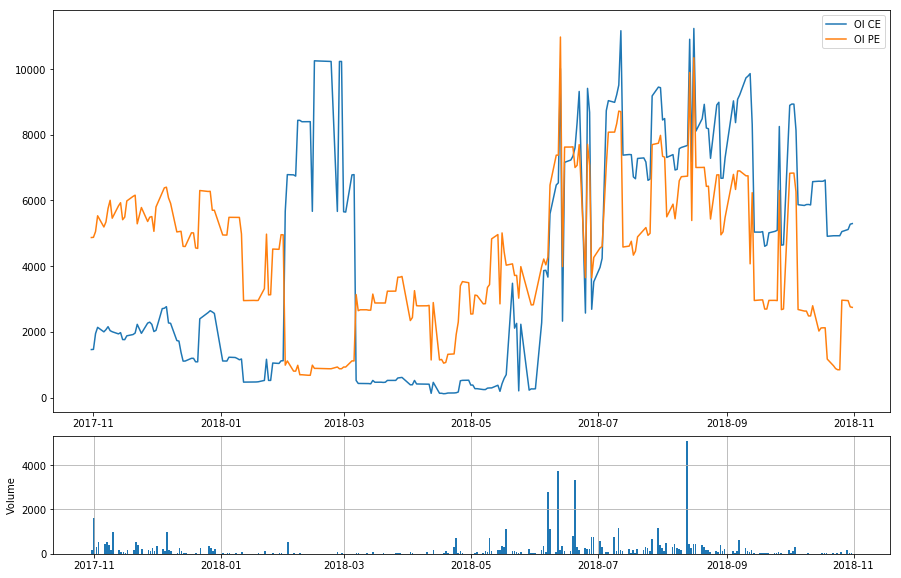

In [76]:
plt.figure(figsize=(15,10))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(OI_mean_38CE.open_interest.index,OI_mean_38CE.open_interest,label ='OI CE')
top.plot(OI_mean_38PE.open_interest.index,OI_mean_38PE.open_interest,label ='OI PE')
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(V_mean_38.trade_volume.index, V_mean_38['trade_volume']) 

bottom.grid('on')
bottom.set_ylabel('Volume')
    # plt.plot(OI_mean_30PE.index,OI_mean_30PE.open_interest)
# OI_mean_30CE.open_interest.plot()
# OI_mean_30PE.open_interest.plot()
# OI_mean_30CE.open_interest.plot()
# OI_mean_30PE.open_interest.plot()
top.legend()

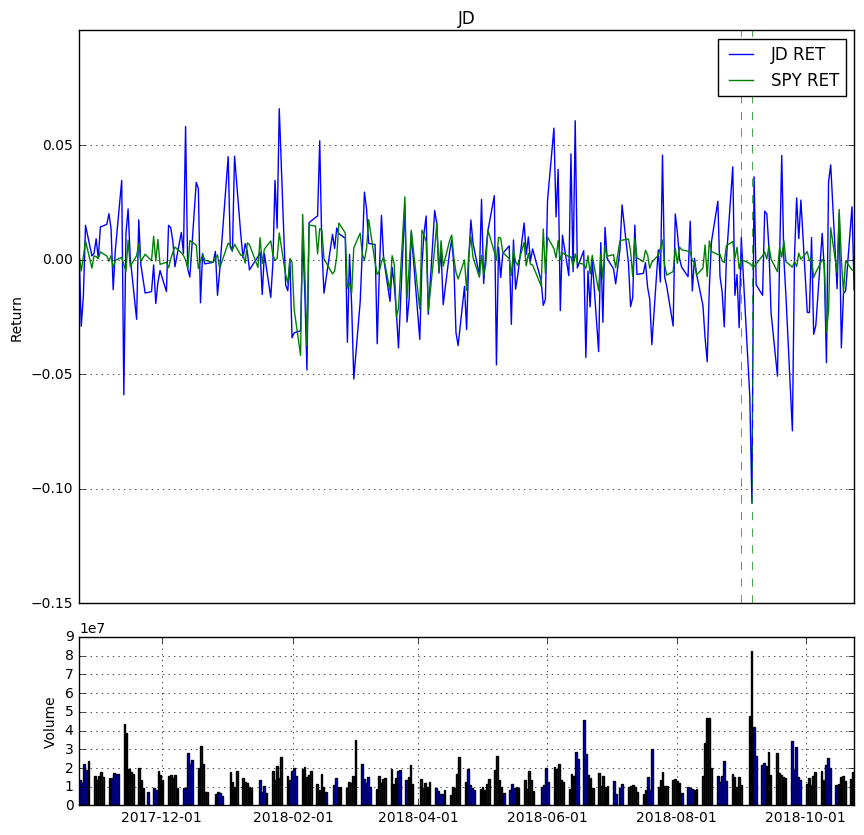

In [11]:
plt.figure(figsize=(10,10))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
top.plot(JD.index, JD_pct,label = 'JD RET') 
top.plot(JD.index,SPY_pct,label = 'SPY RET')
top.grid('on') 
bottom.bar(JD.index, JD['Volume']) 
bottom.grid('on')
top.axvline(x = '2018-08-31', color = "red", lw=0.5, linestyle='dashed')
top.axvline(x = '2018-09-05', color = "green", lw=0.5, linestyle='dashed')
# set the labels
top.axes.get_xaxis().set_visible(False)
top.set_title('JD')
top.set_ylabel('Return')
bottom.set_ylabel('Volume')
bottom.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
top.legend()

In [ ]:
JD_SI_pct = JD_SI_STOCK['Adj Close'].pct_change()
SI_pct = JD_SI_STOCK['Short Interest'].pct_change()

In [31]:
JD_SI_pct_lag1 = JD_SI_pct.shift(1)
JD_SI_pct_lag2 = JD_SI_pct.shift(2)
JD_SI_pct_lag3 = JD_SI_pct.shift(3)


In [54]:
lags = pd.DataFrame()
lags['RET_LAG1'] = JD_SI_pct_lag1
lags['RET_LAG2'] = JD_SI_pct_lag2
lags['RET_LAG3'] = JD_SI_pct_lag3
lags['SI_pct'] = SI_pct
lags.dropna(inplace=True)

In [92]:
JD_SI_pct_lead1 = JD_SI_pct.shift(-1)
JD_SI_pct_lead2 = JD_SI_pct.shift(-2)
JD_SI_pct_lead3 = JD_SI_pct.shift(-3)


In [93]:
leads = pd.DataFrame()
leads['RET_LEAD1'] = JD_SI_pct_lead1
leads['RET_LEAD2'] = JD_SI_pct_lead3
leads['RET_LEAD3'] = JD_SI_pct_lead3
leads['SI_pct'] = SI_pct
leads.dropna(inplace=True)

In [98]:
leads_without_shock =leads.ix[:-34]

In [99]:
leads_with_shock =leads.ix[34:]

In [103]:
X = leads_without_shock[['SI_pct']]

X = sm.add_constant(X)
model = sm.OLS(leads_without_shock['RET_LEAD1'], X).fit()
predictions = model.predict(X) # make the predictions by the model


# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              RET_LEAD1   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9876
Date:                Tue, 30 Oct 2018   Prob (F-statistic):              0.321
Time:                        15:55:49   Log-Likelihood:                 526.23
No. Observations:                 216   AIC:                            -1048.
Df Residuals:                     214   BIC:                            -1042.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0007      0.001     -0.512      0.609        -0.004     0.002
SI_pct         0.0395      0.040      0.994      0.321        -0.039     0.118
==============================================================================
Omnibus:                        7.010   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                8.190
Skew:                           0.272   Prob(JB):                       0.0167
Kurtosis:                       3.783   Cond. No.                         27.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
lags_without_shock = lags.ix[:-37]

In [70]:
lags_with_shock = lags.ix[37:]

In [75]:
import statsmodels.api as sm
X = lags_with_shock[['RET_LAG1']]

X = sm.add_constant(X)
model = sm.OLS(lags_with_shock['SI_pct'], X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SI_pct   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.653
Date:                Tue, 30 Oct 2018   Prob (F-statistic):              0.105
Time:                        14:08:08   Log-Likelihood:                 374.32
No. Observations:                 212   AIC:                            -744.6
Df Residuals:                     210   BIC:                            -737.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0007      0.003     -0.232      0.817        -0.006     0.005
RET_LAG1      -0.1940      0.119     -1.629      0.105        -0.429     0.041
==============================================================================
Omnibus:                      143.255   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15709.703
Skew:                           1.589   Prob(JB):                         0.00
Kurtosis:                      45.052   Cond. No.                         41.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
X = lags_without_shock[['RET_LAG1']]

X = sm.add_constant(X)
model = sm.OLS(lags_without_shock['SI_pct'], X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SI_pct   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3.692
Date:                Tue, 30 Oct 2018   Prob (F-statistic):             0.0560
Time:                        16:08:17   Log-Likelihood:                 401.50
No. Observations:                 212   AIC:                            -799.0
Df Residuals:                     210   BIC:                            -792.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0003      0.003      0.117      0.907        -0.005     0.005
RET_LAG1      -0.2275      0.118     -1.922      0.056        -0.461     0.006
==============================================================================
Omnibus:                      127.293   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7505.447
Skew:                          -1.457   Prob(JB):                         0.00
Kurtosis:                      32.003   Cond. No.                         47.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

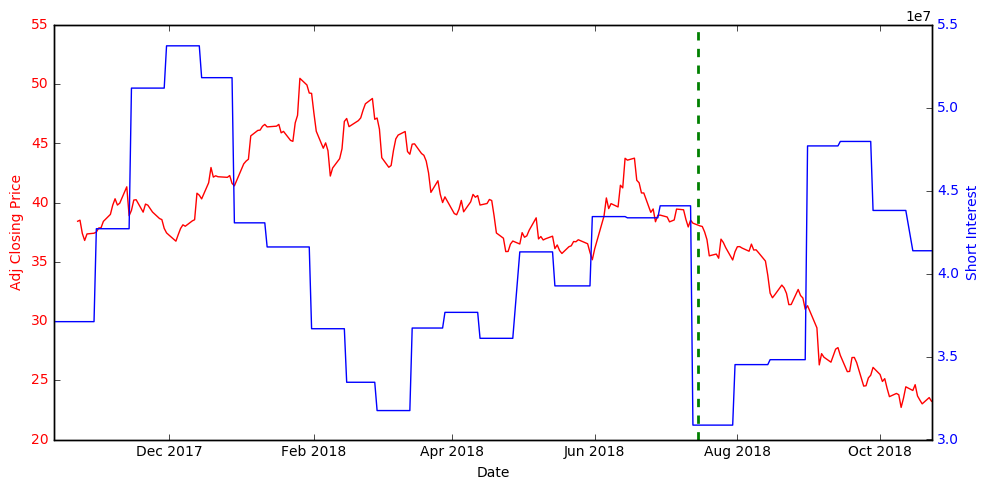

In [91]:
fig, ax1 = plt.subplots(figsize=(10,5))

color = 'red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Adj Closing Price', color=color)
ax1.plot(JD_SI_STOCK.index, JD_SI_STOCK['Adj Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axvline(x = '2018-07-15', color = "green", lw=2, linestyle='dashed')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Short Interest', color=color)  # we already handled the x-label with ax1
ax2.plot(JD_SI_STOCK.index, JD_SI_STOCK['Short Interest'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
# otherwise the right y-label is slightly clipped
plt.show()

The green line in the graph above locates on Aug 31, 2018, the date when the scandal broke out. The question is that .

#abnormal return?\

#exclude or include after 8.31

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


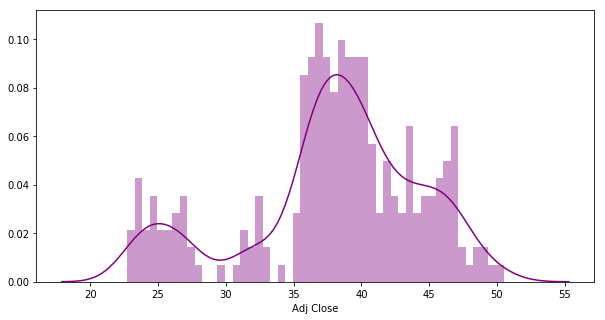

In [24]:
plt.figure(figsize=(10,5))
sns.distplot(JD['Adj Close'].dropna(), bins=50, color='purple')